In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns


### Análisis de los Datos

In [38]:
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
# df = pd.read_csv("./datasets/day.csv")
df = pd.read_csv('./datasets/autos_mpg.csv')
cols = []

# Removing useless data
del df['car_name']
for col in df:
    cols.append(col)
    
    
    
df.head(10)
# cov_mat = np.cov(df)

# print(len(cov_mat), len(cov_mat[0]))
 
# temp_dict = {}

# for index_i, i in enumerate(df):
#     temp_dict[i] = cov_mat[index_i]
    
# cov_mat_w_headers = pd.DataFrame(temp_dict)

# cov_mat_w_headers.head(50)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [39]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Pair plot para analizar las relaciones entre los datos

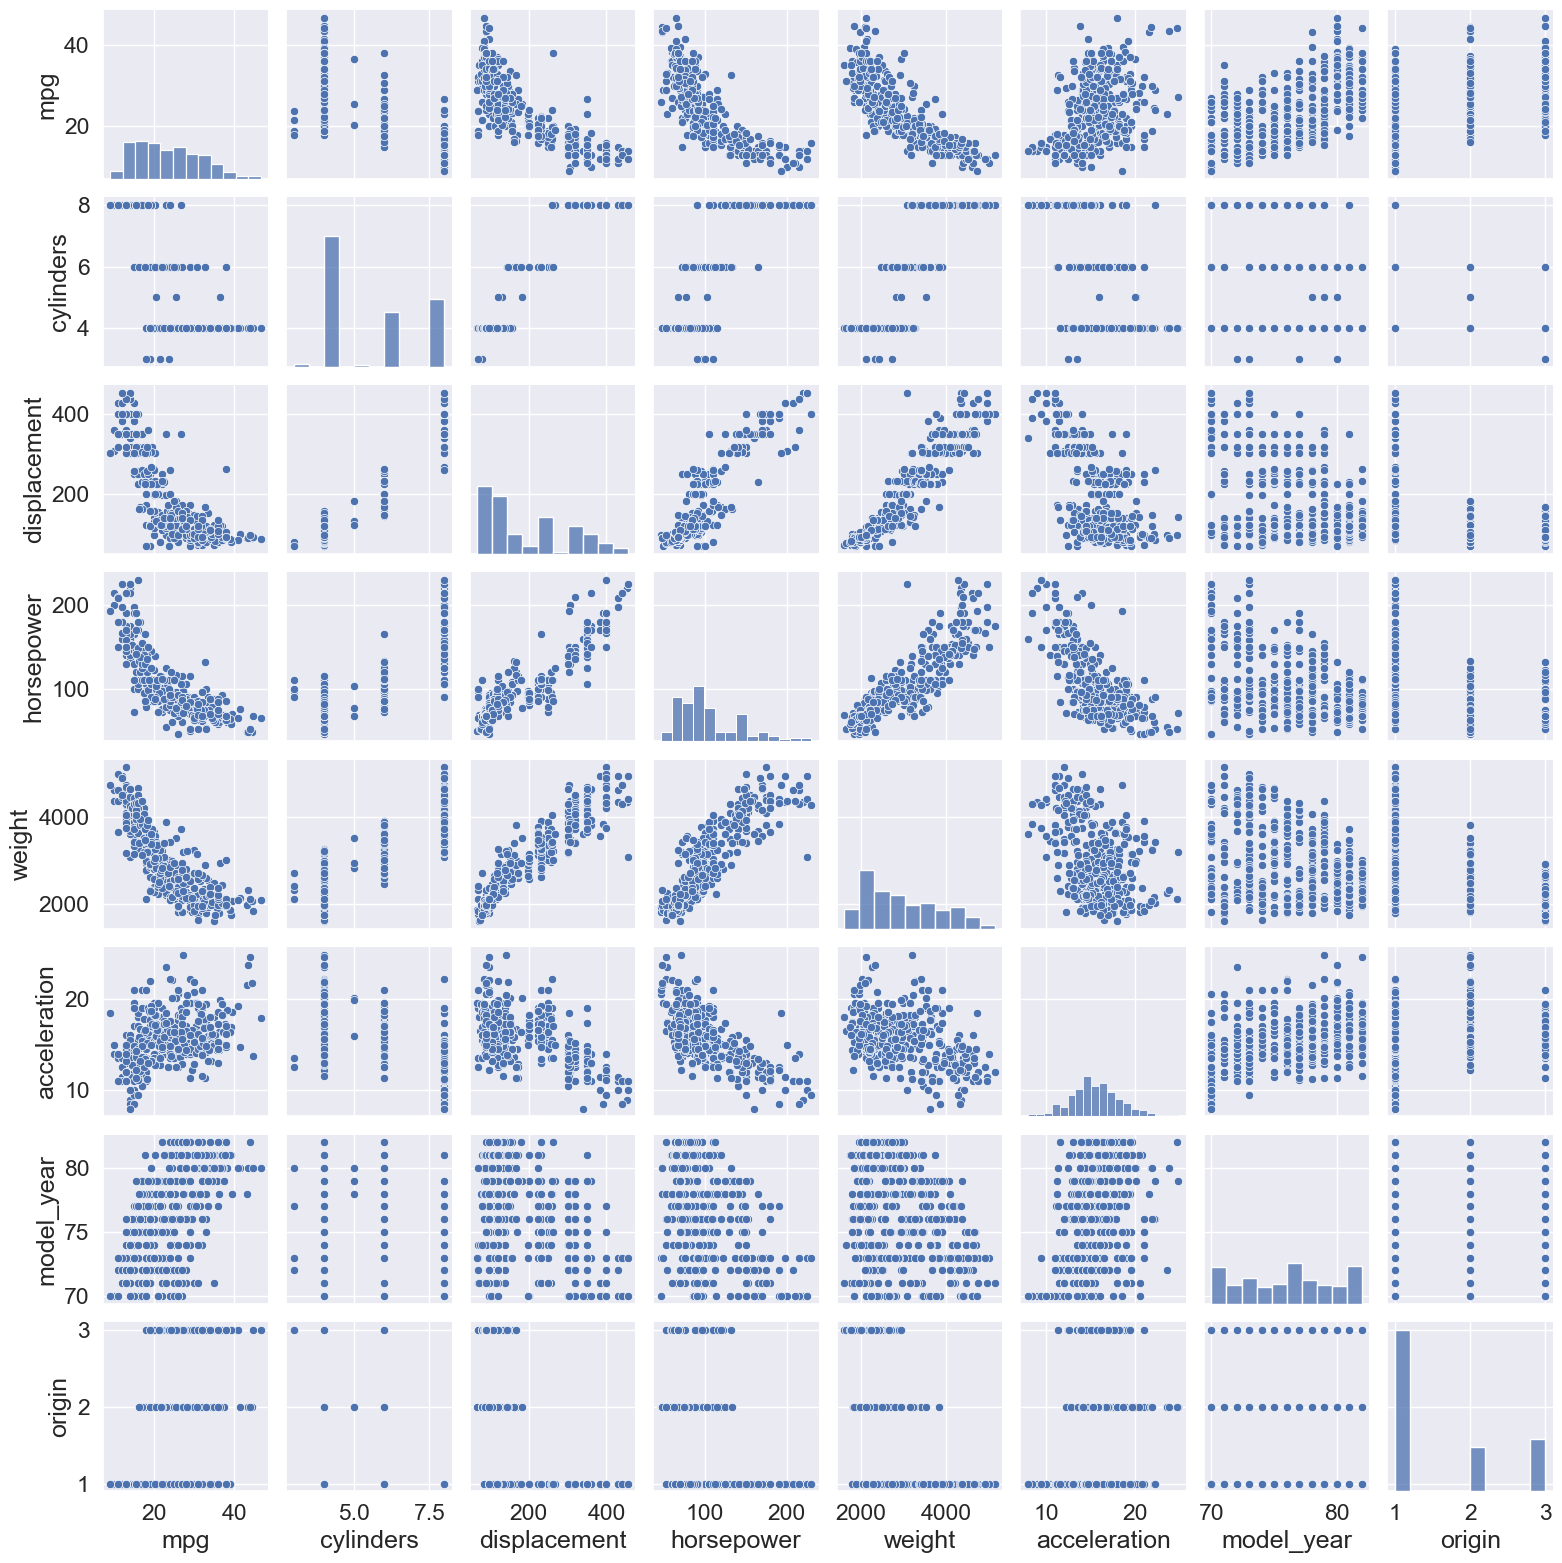

In [40]:
# Try not to re-run this. Takes about a minute to finish
sns.pairplot(df[cols], height=2.0)

### Matriz de covarianza expresada mediante un heatmap

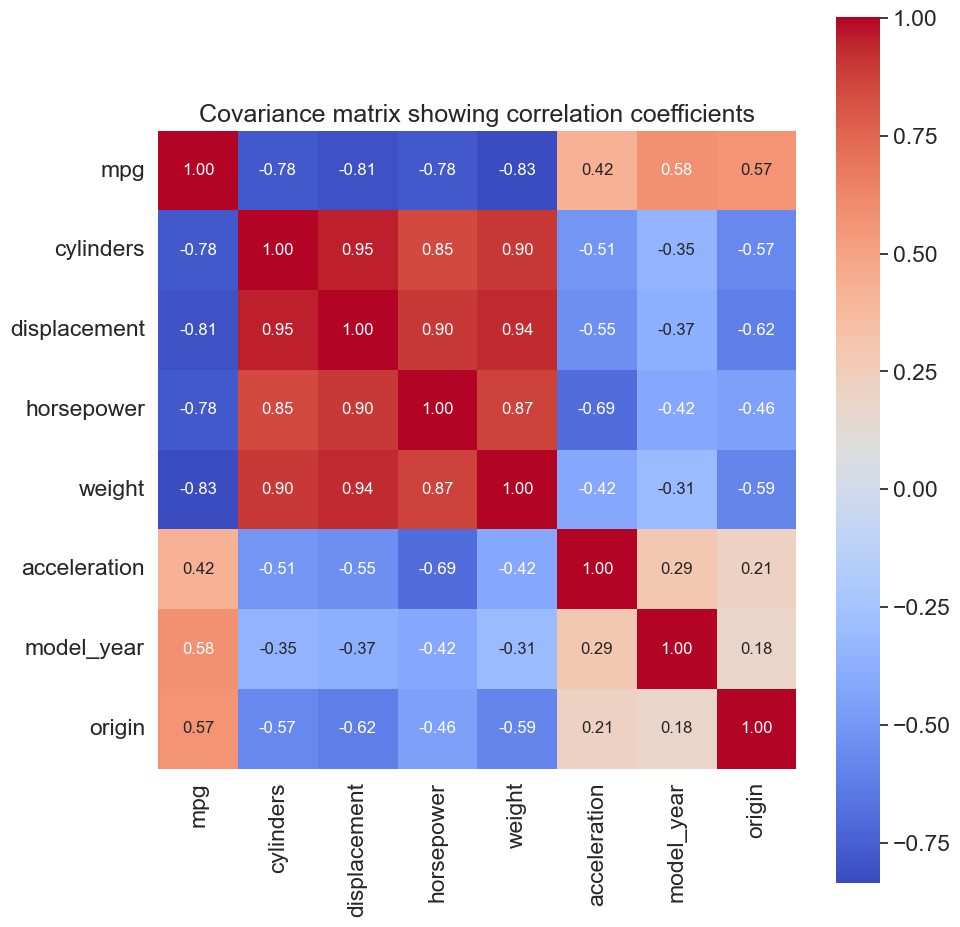

In [41]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,8)].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

### Selección de features más relevantes para MPG
Para esto se escogieron los features con covarianza más fuerte. En este caso se escogieron valores con un mínimo de | 0.78 |.

In [42]:
cols_selected = ['mpg', 'weight', 'displacement', 'cylinders', 'horsepower']
  
df[cols_selected].head()

,mpg,weight,displacement,cylinders,horsepower,model_year
0,18.0,3504,307.0,8,130,70
1,15.0,3693,350.0,8,165,70
2,18.0,3436,318.0,8,150,70
3,16.0,3433,304.0,8,150,70
4,17.0,3449,302.0,8,140,70


In [43]:
X = (df['weight']-df['weight'].mean())/df['weight'].std() #standardization of the dataset
y = (df["mpg"]-df['mpg'].mean())/df["mpg"].std()

### Regresión Lineal

In [44]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [45]:
print (X)
print (X.shape[0])

0      0.619748
1      0.842258
2      0.539692
3      0.536160
4      0.554997
         ...   
387   -0.220842
388   -0.997859
389   -0.803605
390   -0.415097
391   -0.303253
Name: weight, Length: 392, dtype: float64
392


In [46]:
X = (X-X.mean())/X.std() #Feature Engeneering: Standarization 
y = (y-y.mean())/y.std()
X.shape, y.shape

((392,), (392,))

In [47]:
reg = LinearRegression(n_features=1)

[-0.83224421] -1.6852645891298787e-17
(392,) (392, 1)


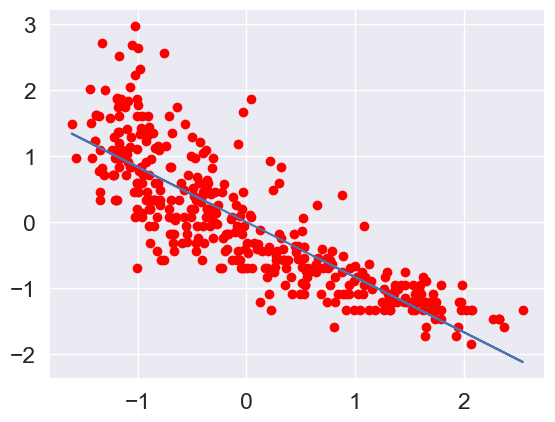

In [48]:
params = reg.train(X, y, epochs=80, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(X[:500], y[:500], color='red')
pred = reg.predict(np.array(X[:500]))
plt.plot(X[:500], pred[:500])

## Segunda Parte

### Solo utilizando listas

In [49]:
import random

In [50]:
X = (df['weight']-df['weight'].mean())/df['weight'].std() #standardization of the dataset
y = (df["mpg"]-df['mpg'].mean())/df["mpg"].std()

In [51]:
class LinearRegression_lists:
    
    def __init__(self, n_features):
        self.W = [[random.normalvariate(-1, 1)] for i in range(n_features)] #weights
        self.b = random.random() #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        for i in range(len(delta_W)):
            for j in range(len(delta_W[0])):
                delta_W[i][j] *= learning_rate
        self.W = self.matrix_substraction(self.W, delta_W)                                                                 
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        WXi = self.matrix_multiplication(X, self.W) # Multiply W by X
        # Add b to multiplication
        for i in range(len(WXi)):
            for j in range(len(WXi[0])):
                WXi[i][j] += self.b
        # Substraction of WX + b and Y, then multiplication of the result by X
        delta_W  = self.matrix_multiplication(self.transpose_matrix(self.matrix_substraction(WXi, Y)), X)
        # Multiplying delta_W by 2/N
        for i in range(len(delta_W)):
            for j in range(len(delta_W[0])):
                delta_W[i][j] *= 2/len(X)
        #partial derivative of cost w.r.t the intercept
        # Substraction of WX + b and Y, then total sum of the result
        delta_b = self.matrix_sum_total(self.transpose_matrix(self.matrix_substraction(WXi, Y)))
        # Multiplying delta_b by 2/N
        delta_b *= 2/len(X)
        return delta_W, delta_b
    
    def transpose_matrix(self, A):
        rows, cols = len(A), len(A[0])
        B = [[0 for y in range(rows)] for x in range(cols)]
        for i in range(rows):
            for j in range(cols):
                B[j][i] = A[i][j]
        return B
        
    
    def matrix_multiplication(self, A, B):
        rows_A, cols_A = len(A), len(A[0])
        rows_B, cols_B = len(B), len(B[0])
        
        if cols_A != rows_B:
            print("Matrix dimensions don't match for multiplication!")
            print(f"Rows A = {rows_A}")
            print(f"Cols A = {cols_A}")
            print(f"Rows B = {rows_B}")
            print(f"Cols B = {cols_B}")
            return None
        
        # initialize the resulting matrix with zeros
        C = [[0 for y in range(cols_B)] for x in range(rows_A)]
        
        # iterate over each row in A
        for i in range(rows_A):
            # iterate over each column in B
            for j in range(cols_B):
                # iterate over each element in the row of A and the column of B
                for k in range(cols_A):
                    C[i][j] += A[i][k] * B[k][j]
                    
        return C
    
    def matrix_addition(self, A, B):
        rows, cols = len(A), len(A[0])
        
        if rows != len(B) or cols != len(B[0]):
            print("Matrix dimensions don't match for addition!")
            return None
        
        # initialize the resulting matrix with zeros
        C = [[0 for y in range(cols)] for x in range(rows)]
        
        # iterate over each element in A and B and add them to get the corresponding element in C
        for i in range(rows):
            for j in range(cols):
                C[i][j] = A[i][j] + B[i][j]
                    
        return C
    
    def matrix_substraction(self, A, B):
        rows, cols = len(A), len(A[0])
        
        if rows != len(B) or cols != len(B[0]):
            print("Matrix dimensions don't match for addition!")
            return None
        
        # initialize the resulting matrix with zeros
        C = [[0 for y in range(cols)] for x in range(rows)]
        
        # iterate over each element in A and B and add them to get the corresponding element in C
        for i in range(rows):
            for j in range(cols):
                C[i][j] = A[i][j] - B[i][j]
                    
        return C
    
    def matrix_sum_total(self, A):
        total = 0
        for i in range(len(A)):
            for j in range(len(A[0])):
                total += A[i][j]
        return total
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        start_time = time.time()
        X = [[x] for x in X]
        Y = [[y] for y in Y]

        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
        return self.W, self.b, time.time() - start_time

    def predict(self, X):
        X = [[x] for x in X]
        product = self.matrix_multiplication(X, self.W)
        for i in range(len(product)):
            for j in range(len(product[0])):
                product[i][j] += self.b
        return product

In [52]:
reg = LinearRegression_lists(n_features=1)

0.20999550819396973


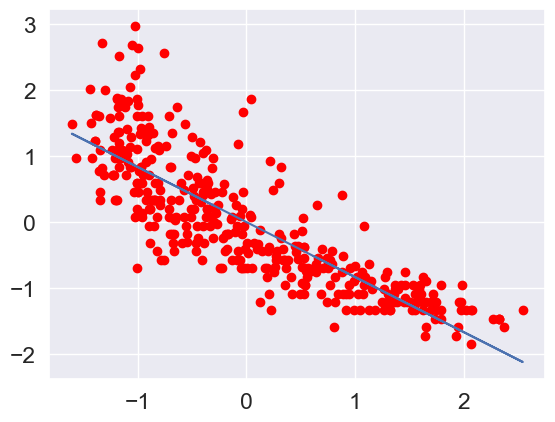

In [53]:
W, b, time_lists = reg.train(X, y, epochs=80, learning_rate=0.225)
print(time_lists)
plt.scatter(X[:500], y[:500], color='red')
pred = reg.predict(np.array(X[:500]))
plt.plot(X[:500], pred[:500])

### Utilizando Pytorch

In [60]:
import torch

In [61]:
class LinearRegression_torch(torch.nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.W = torch.randn(n_features, 1, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W = self.W - torch.mul(learning_rate, delta_W)                                                          
        self.b = self.b - torch.mul(learning_rate, delta_b)
        
    def derivatives(self, X, Y):
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(torch.mul(((torch.mul(X,self.W)+self.b)-Y), X))*2/len(X)
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.mul(X,self.W)+self.b)-Y))*2/len(X)              
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        start_time = time.time()
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)
        X = torch.reshape(X, (-1,1)) # aplana el modelo
        Y = torch.reshape(Y, (-1,1)) # aplana el modelo
              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate) 
            
        return self.W, self.b, time.time() - start_time

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        X = torch.reshape(X, (-1,1)) # aplana el modelo
        prediction = torch.mul(X,self.W) + self.b
        return prediction.detach().numpy()
    
    # def predict(self, X): 
    #     product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
    #     return product

In [62]:
reg = LinearRegression_torch(n_features=1)

0.02700495719909668


C:\Users\maria\AppData\Local\Temp\ipykernel_24780\684845842.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\maria\AppData\Local\Temp\ipykernel_24780\684845842.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32)


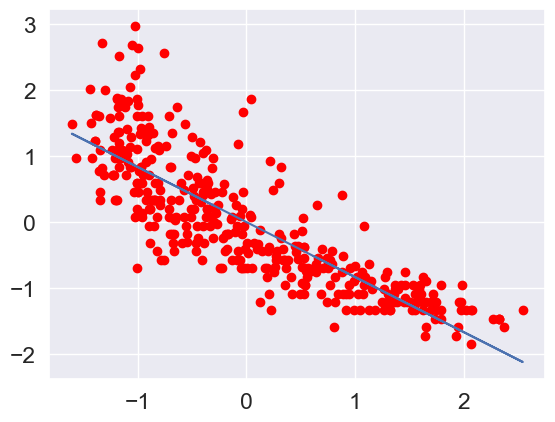

In [63]:
W, b, time_pytorch = reg.train(X, y, epochs=80, learning_rate=0.225)
print(time_pytorch)
plt.scatter(X[:500], y[:500], color='red')
pred = reg.predict(np.array(X[:500]))
plt.plot(X[:500], pred[:500])

### Comparacion entre Listas y Pytorch

In [79]:
#Set 1
dataset_autos = pd.read_csv('./datasets/autos_mpg.csv')
X_autos = (dataset_autos['weight']-dataset_autos['weight'].mean())/dataset_autos['weight'].std() #standardization of the dataset
y_autos = (dataset_autos["mpg"]-dataset_autos['mpg'].mean())/dataset_autos["mpg"].std()

In [80]:
#Set 2
X_ours = 7 * np.random.rand(1000, 1)
y_ours = 5 + 4 * X_ours + np.random.rand(1000, 1)
X_ours = (X_ours - np.mean(X_ours)) / np.std(X_ours)
y_ours = (y_ours - np.mean(y_ours)) / np.std(y_ours)

In [81]:
#Set 3
dataset_clase = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
X_clase = (dataset_clase['Weight']-dataset_clase['Weight'].mean())/dataset_clase['Weight'].std() #standardization of the dataset
y_clase = (dataset_clase["Height"]-dataset_clase['Height'].mean())/dataset_clase["Height"].std()

In [82]:
data = [(X_autos, y_autos),(X_ours, y_ours),(X_clase, y_clase)]
reg_lists = LinearRegression_lists(n_features=1)
reg_torch = LinearRegression_torch(n_features=1)
times = []
for X , Y in data:
    W, b, time_lists = reg_lists.train(X, Y, epochs=80, learning_rate=0.225)
    W, b, time_pytorch = reg.train(X, Y, epochs=80, learning_rate=0.225)
    times.append([time_lists, time_pytorch, len(X)])

C:\Users\maria\AppData\Local\Temp\ipykernel_24780\684845842.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\maria\AppData\Local\Temp\ipykernel_24780\684845842.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32)


In [83]:
pd.DataFrame(times,
             ["Auto Dataset", "Our Dataset", "Class Dataset"],
             ["Time lists", "Time pytorch", "Dataset Size"])

,Time lists,Time pytorch,Dataset Size
Auto Dataset,0.534666,0.030004,392
Our Dataset,1.582539,0.018002,1000
Class Dataset,19.215179,0.030988,10000


#### Resultados
Como se puede ver en la tabla anterior, los resultados de Pytorch son mucho mas rapidos y eficientes que los obtenidos por medio de listas, ya que como se comento en clase, Pytorch esta especialmente optimizado para operar con matrices. Se puede observar que el tamaño del dataset hace que las listas sean mas lentas, donde a mayor cantidad de datos, mas lento es, mientras que Pytorch casi no se ve afectado por el tamaño